In [ ]:
#Importing libraries
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Load the dataset
dataset = sns.load_dataset('titanic')

In [ ]:
# Display the first 5 rows of the dataset to get an overview of the data
dataset.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# Print the number of rows and columns in the dataset (rows, columns)
print(dataset.shape)

(891, 15)


In [ ]:
# Print the list of all column names in the dataset
print(dataset.columns)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


In [ ]:
# Calculate the number of missing (null) values in each column
missing_values = dataset.isnull().sum()

# Print the count of missing values for each column
print(missing_values)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [ ]:
# Print the data type of each column in the dataset
print(dataset.dtypes)

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object


In [ ]:
# Generate descriptive statistics for all numerical columns in the dataset
print(dataset.describe())

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [ ]:
# Generate descriptive statistics for all columns, including categorical ones
print(dataset.describe(include='all'))

          survived      pclass   sex         age       sibsp       parch  \
count   891.000000  891.000000   891  714.000000  891.000000  891.000000   
unique         NaN         NaN     2         NaN         NaN         NaN   
top            NaN         NaN  male         NaN         NaN         NaN   
freq           NaN         NaN   577         NaN         NaN         NaN   
mean      0.383838    2.308642   NaN   29.699118    0.523008    0.381594   
std       0.486592    0.836071   NaN   14.526497    1.102743    0.806057   
min       0.000000    1.000000   NaN    0.420000    0.000000    0.000000   
25%       0.000000    2.000000   NaN   20.125000    0.000000    0.000000   
50%       0.000000    3.000000   NaN   28.000000    0.000000    0.000000   
75%       1.000000    3.000000   NaN   38.000000    1.000000    0.000000   
max       1.000000    3.000000   NaN   80.000000    8.000000    6.000000   

              fare embarked  class  who adult_male deck  embark_town alive  \
count   8

In [ ]:
# Create a copy of the original dataset to avoid modifying the original
dataset_copy = dataset.copy()

# Select all numerical columns (e.g., age, fare)
numerical_cols = dataset_copy.select_dtypes(include=['number']).columns

# Select all categorical columns (e.g., sex, embarked)
categorical_cols = dataset_copy.select_dtypes(exclude=['number']).columns

# Import SimpleImputer from sklearn to handle missing numerical values
from sklearn.impute import SimpleImputer

# Create an imputer object to replace missing values with the column mean
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Fit the imputer on numerical columns and transform them
imputer.fit(dataset_copy[numerical_cols])
dataset_copy[numerical_cols] = imputer.transform(dataset_copy[numerical_cols])

# For each categorical column, fill missing values with the most frequent value (mode)
for col in categorical_cols:
    dataset_copy[col] = dataset_copy[col].fillna(dataset_copy[col].mode()[0])

# Check again for any missing values after imputation
missing_data_2 = dataset_copy.isnull().sum()
print(missing_data_2)

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64


In [ ]:
# Print a concise summary of the dataset, including:
# - Number of non-null entries in each column
# - Data types of each column
# - Total memory usage
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


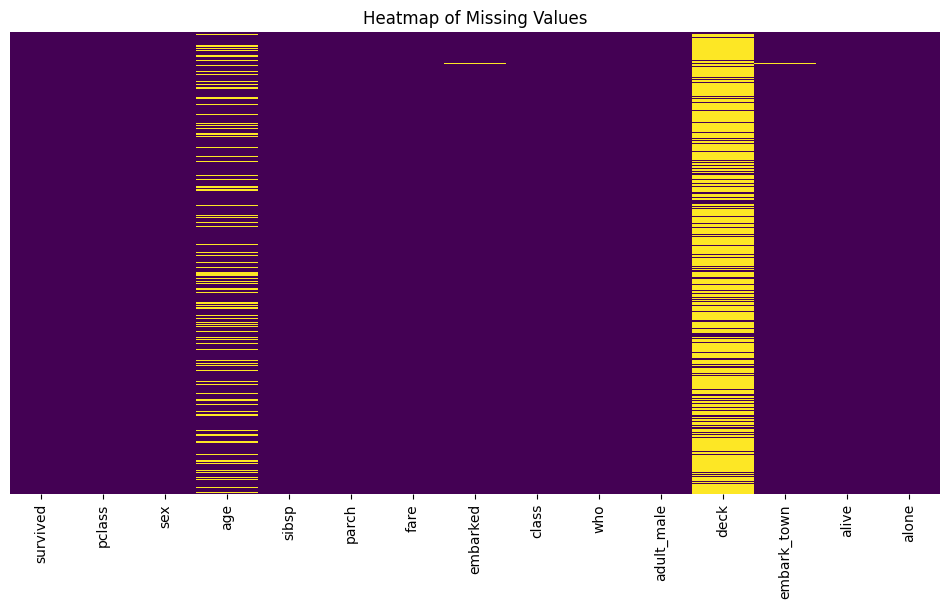

In [ ]:
# Set the size of the plot
plt.figure(figsize=(12, 6))

# Create a heatmap to visualize missing values in the dataset
sns.heatmap(dataset.isnull(),       # True for missing values, False otherwise
            cbar=False,             # Disable the color bar for cleaner output
            cmap='viridis',         # Use 'viridis' color palette
            yticklabels=False)      # Hide row indices for simplicity

# Add a title to the plot
plt.title("Heatmap of Missing Values")

# Display the plot
plt.show()


In [ ]:
# Print the number of unique values in each column of the dataset
print(dataset.nunique())

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64


In [ ]:
# Function to find outliers in a specific column using the IQR (Interquartile Range) method
def find_outliers_iqr(data, column):
    # Calculate the first quartile (25th percentile)
    Q1 = data[column].quantile(0.25)

    # Calculate the third quartile (75th percentile)
    Q3 = data[column].quantile(0.75)

    # Compute the Interquartile Range
    IQR = Q3 - Q1

    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find data points that are below the lower bound or above the upper bound (i.e., outliers)
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    # Return the outlier rows along with the lower and upper bounds
    return outliers, lower_bound, upper_bound

In [ ]:
# Dictionary to store outlier summary for each numerical column
outlier_summary = {}

# Loop through all numerical columns to find outliers
for col in numerical_cols:
    # Use the IQR method to get outliers and bounds for the current column
    outliers, lower, upper = find_outliers_iqr(dataset, col)

    # Store the results in the summary dictionary
    outlier_summary[col] = {
        'count': outliers.shape[0],         # Total number of outliers
        'lower_bound': lower,               # Lower threshold for outliers
        'upper_bound': upper,               # Upper threshold for outliers
        'outliers': outliers[col].values    # Actual outlier values (as a list)
    }

# Print the outlier summary for each numerical column
for col, details in outlier_summary.items():
    print(f"\n🔍 Column: {col}")
    print(f"Outlier Count: {details['count']}")                          # Number of outliers found
    print(f"Lower Bound: {details['lower_bound']:.2f}")                 # Display lower bound (rounded to 2 decimals)
    print(f"Upper Bound: {details['upper_bound']:.2f}")                 # Display upper bound
    print(f"Outlier Values: {details['outliers'][:10]}")                # Print first 10 outlier values only


🔍 Column: survived
Outlier Count: 0
Lower Bound: -1.50
Upper Bound: 2.50
Outlier Values: []

🔍 Column: pclass
Outlier Count: 0
Lower Bound: 0.50
Upper Bound: 4.50
Outlier Values: []

🔍 Column: age
Outlier Count: 11
Lower Bound: -6.69
Upper Bound: 64.81
Outlier Values: [66.  65.  71.  70.5 65.  65.  71.  80.  70.  70. ]

🔍 Column: sibsp
Outlier Count: 46
Lower Bound: -1.50
Upper Bound: 2.50
Outlier Values: [3 4 3 3 4 5 3 4 5 3]

🔍 Column: parch
Outlier Count: 213
Lower Bound: 0.00
Upper Bound: 0.00
Outlier Values: [1 2 1 5 1 1 5 2 2 1]

🔍 Column: fare
Outlier Count: 116
Lower Bound: -26.72
Upper Bound: 65.63
Outlier Values: [ 71.2833 263.     146.5208  82.1708  76.7292  80.      83.475   73.5
 263.      77.2875]


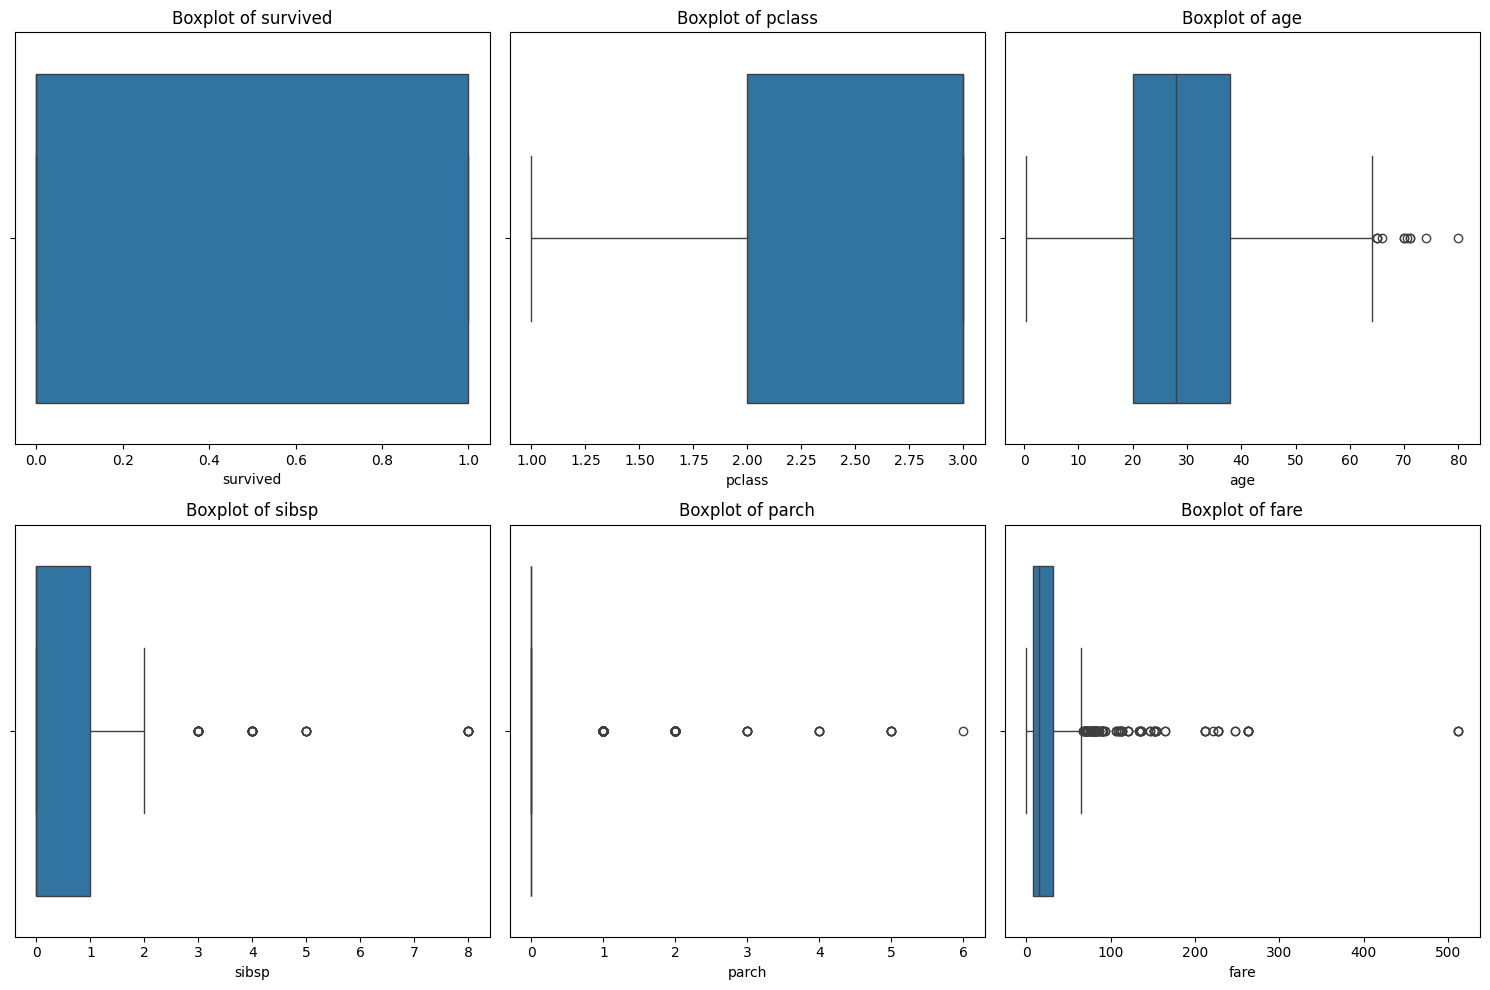

In [ ]:
# Set the overall figure size for all boxplots
plt.figure(figsize=(15, 10))

# Loop through each numerical column to create a boxplot
for i, col in enumerate(numerical_cols):
    # Create a subplot for each column (2 rows x 3 columns layout)
    plt.subplot(2, 3, i + 1)

    # Draw the boxplot for the current column
    sns.boxplot(data=dataset, x=col)

    # Set the title for the subplot
    plt.title(f'Boxplot of {col}')

# Adjust spacing between subplots to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()


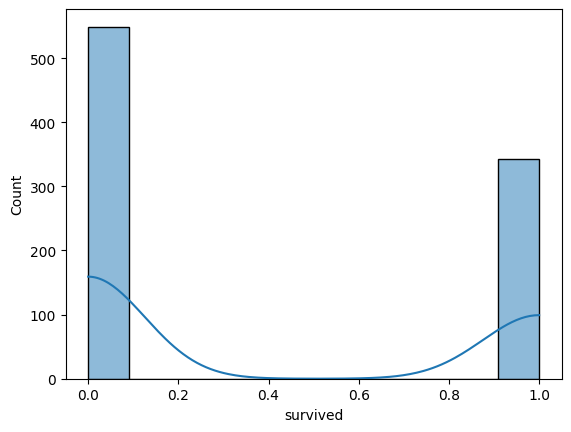

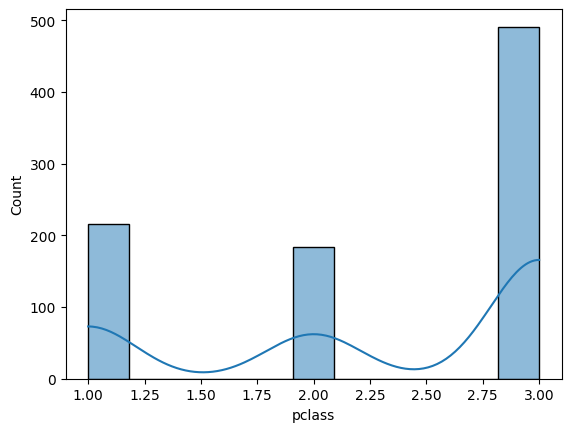

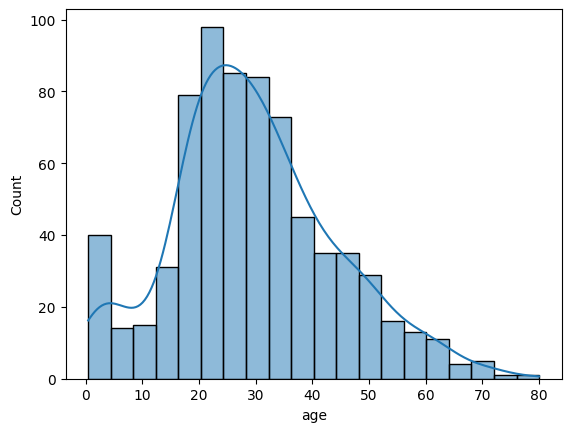

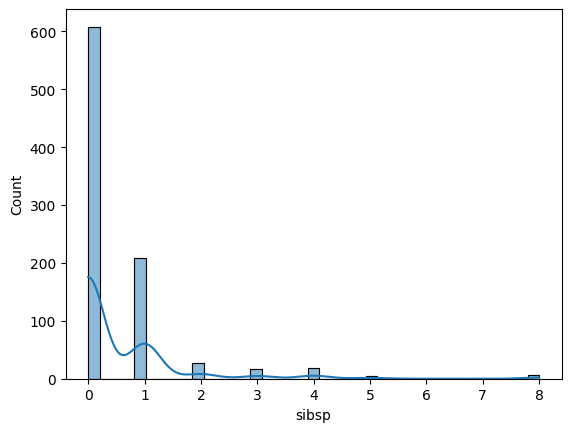

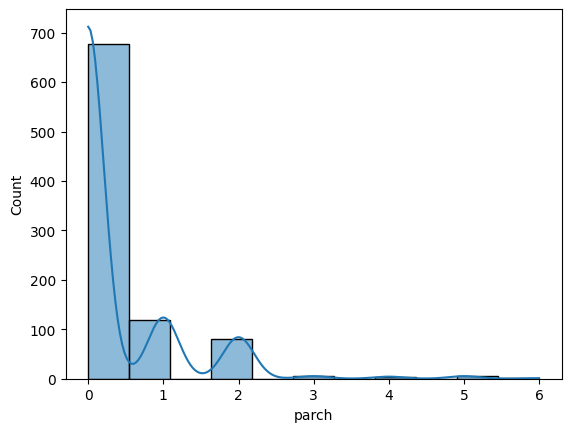

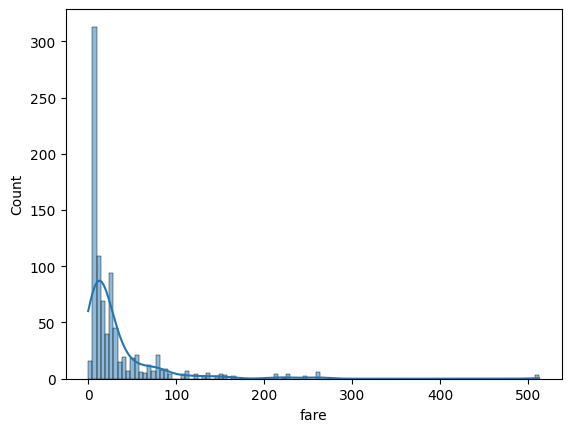

In [ ]:
# Loop through each numerical column (int64 or float64)
for col in dataset.select_dtypes(include=['int64', 'float64']).columns:
    # Plot a histogram with a KDE (Kernel Density Estimate) overlay for each numerical feature
    sns.histplot(dataset[col], kde=True)

    # Display the plot
    plt.show()

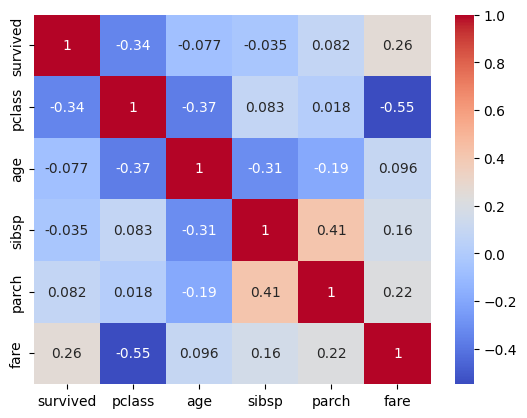

In [ ]:
# Select only numeric columns and compute the correlation matrix
corr = dataset.select_dtypes(include=['int64', 'float64']).corr()

# Create a heatmap to visualize the correlation matrix
sns.heatmap(corr,
            annot=True,        # Display the correlation coefficients on the heatmap
            cmap='coolwarm')   # Use the 'coolwarm' color scheme for contrast

# Show the plot
plt.show()

In [ ]:
# Calculate and print the skewness of the 'pclass' column
print(dataset['pclass'].skew())

# Calculate and print the kurtosis of the 'pclass' column
print(dataset['pclass'].kurt())

-0.6305479068752845
-1.2800149715782825


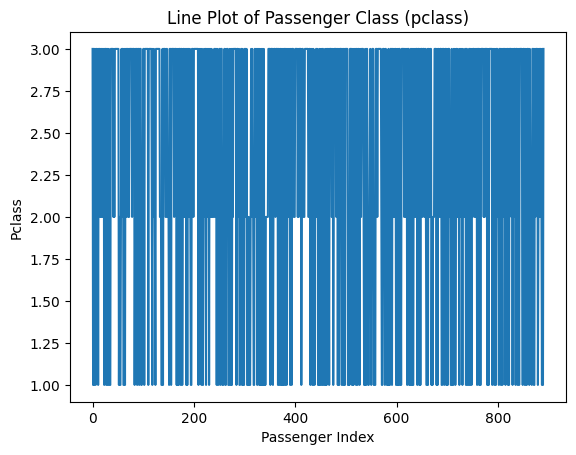

In [ ]:
# Plot the 'pclass' column as a line graph
plt.plot(dataset['pclass'])
plt.title("Line Plot of Passenger Class (pclass)")
plt.xlabel("Passenger Index")
plt.ylabel("Pclass")
plt.show()

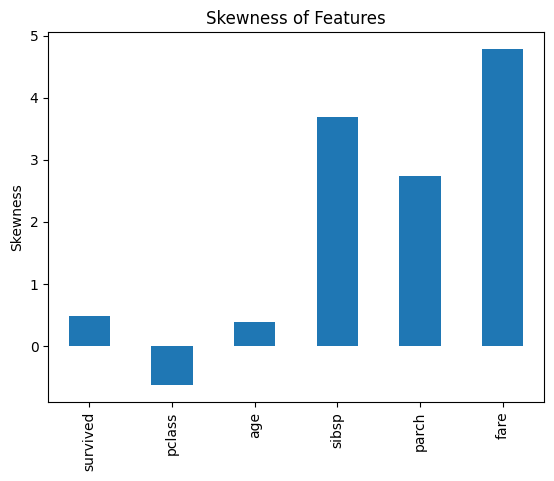

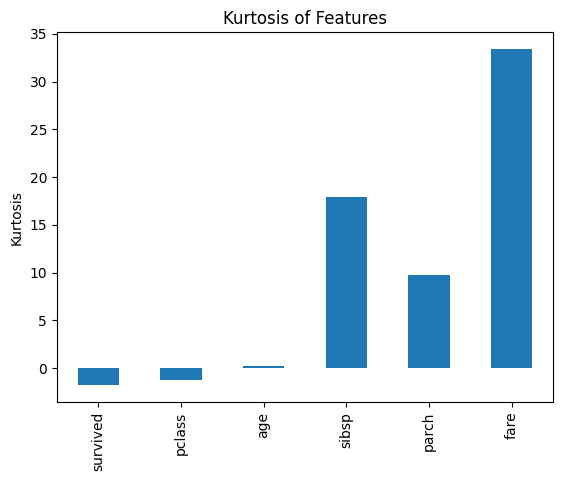

In [ ]:
# ---------------- Skewness Plot ----------------
# Compute skewness for each numeric feature and plot it as a bar chart
dataset[numerical_cols].skew().plot(
    kind='bar',
    title='Skewness of Features'
)
plt.ylabel("Skewness")
plt.show()

# ---------------- Kurtosis Plot ----------------
# Compute kurtosis for each numeric feature and plot it as a bar chart
dataset[numerical_cols].kurt().plot(
    kind='bar',
    title='Kurtosis of Features'
)
plt.ylabel("Kurtosis")
plt.show()

sex
male      577
female    314
Name: count, dtype: int64


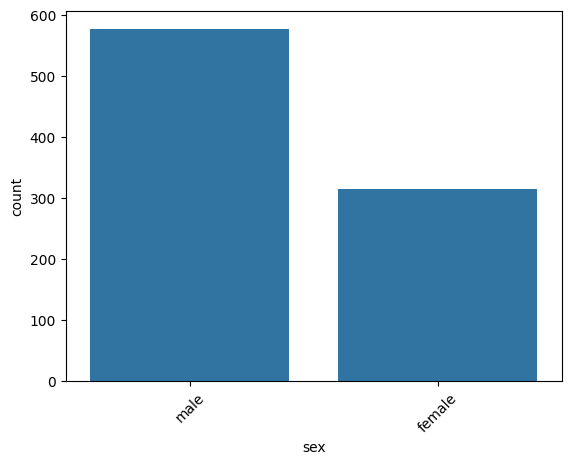

embarked
S    644
C    168
Q     77
Name: count, dtype: int64


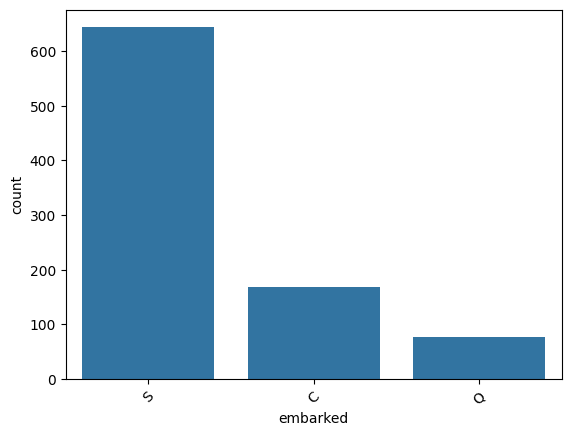

who
man      537
woman    271
child     83
Name: count, dtype: int64


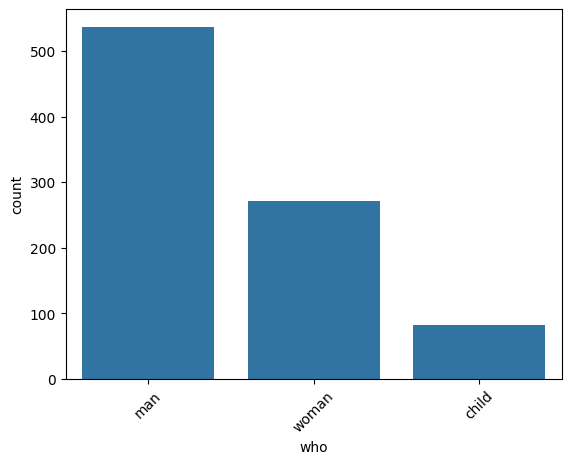

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64


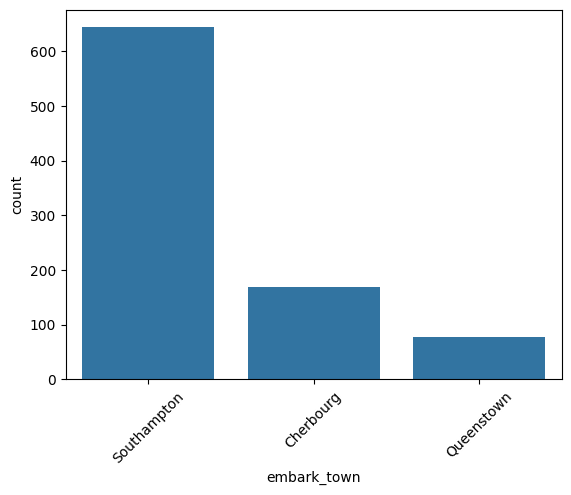

alive
no     549
yes    342
Name: count, dtype: int64


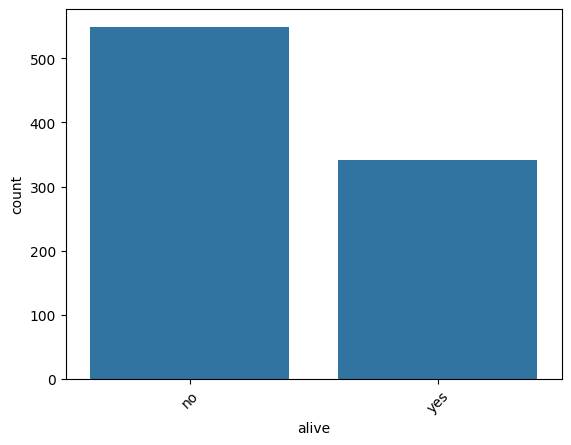

sex
male      577
female    314
Name: count, dtype: int64


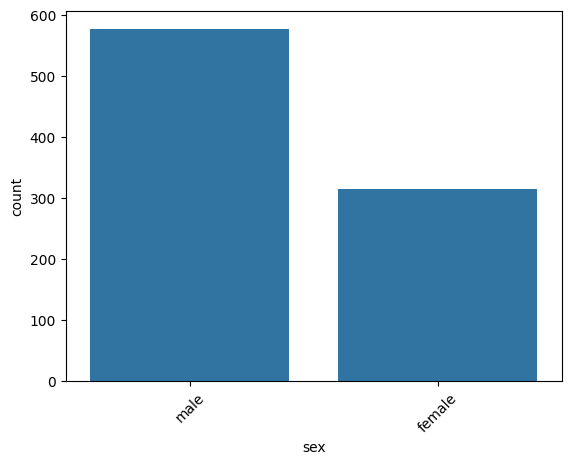

embarked
S    644
C    168
Q     77
Name: count, dtype: int64


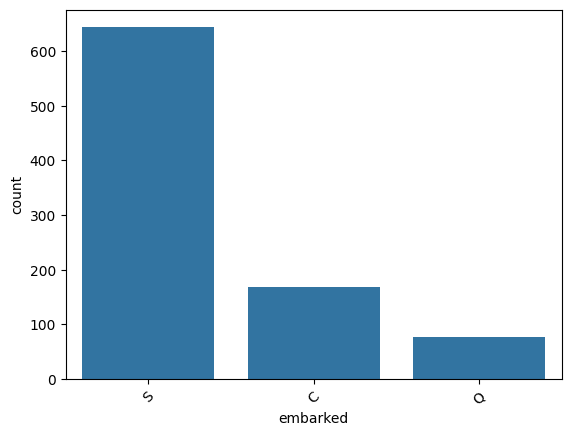

who
man      537
woman    271
child     83
Name: count, dtype: int64


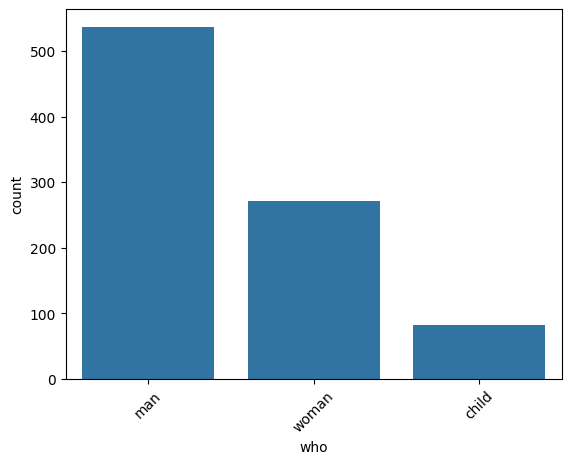

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64


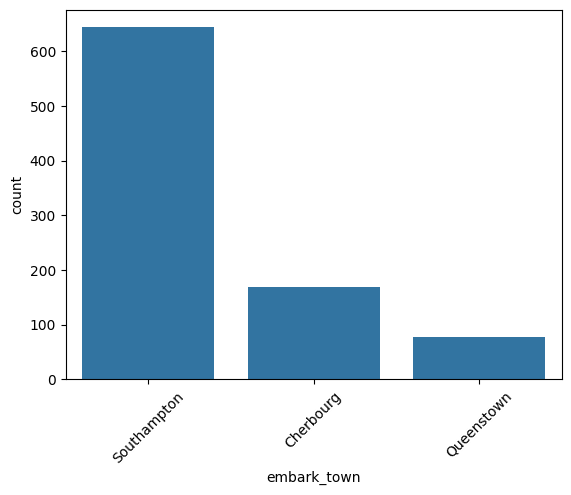

alive
no     549
yes    342
Name: count, dtype: int64


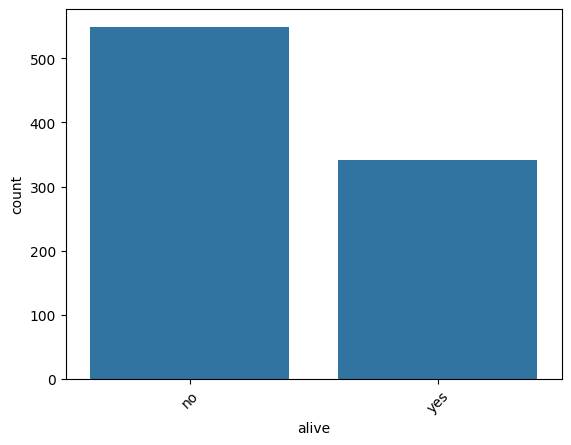

In [ ]:
for col in dataset.select_dtypes(include=['object']).columns:
    print(dataset[col].value_counts())
    sns.countplot(x=col, data=dataset)
    plt.xticks(rotation=45)
    plt.show()# Loop through each categorical column (object type)
for col in dataset.select_dtypes(include=['object']).columns:

    # Print the frequency of each category in the column
    print(dataset[col].value_counts())

    # Plot the count of each category using a countplot
    sns.countplot(x=col, data=dataset)

    # Rotate x-axis labels for better readability (especially for long category names)
    plt.xticks(rotation=45)

    # Display the plot
    plt.show()


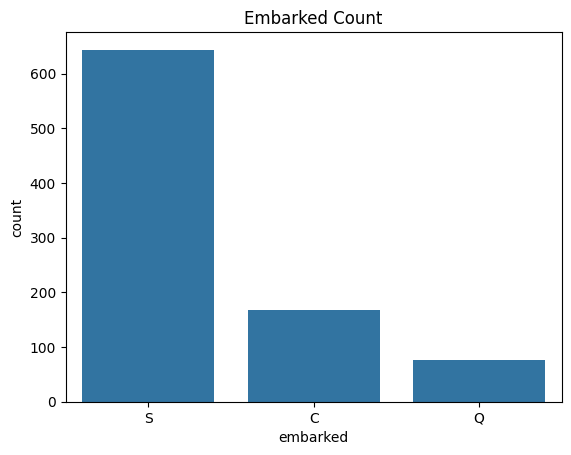

In [ ]:
# Create a countplot for the 'embarked' column to show the number of passengers by embarkation port
sns.countplot(x='embarked', data=dataset)

# Set the title of the plot
plt.title("Embarked Count")

# Display the plot
plt.show()

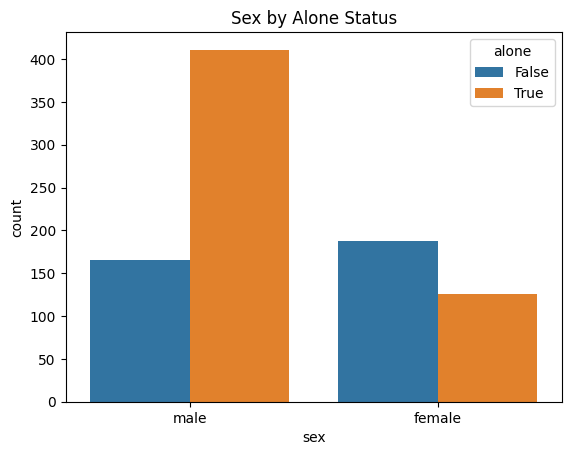

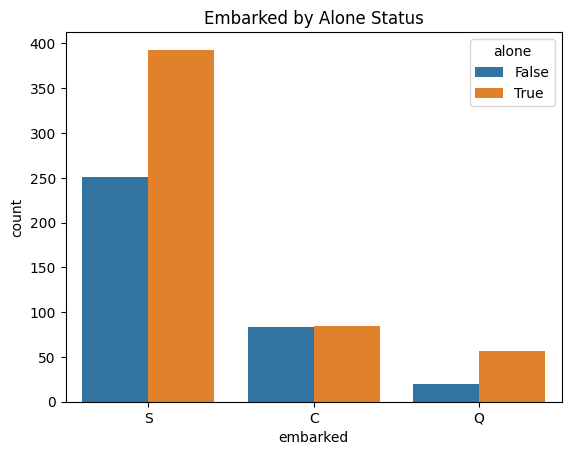

In [ ]:
# Countplot showing distribution of 'sex' grouped by whether the person was alone
sns.countplot(x='sex', hue='alone', data=dataset)
plt.title("Sex by Alone Status")  # Set the plot title
plt.show()

# Countplot showing distribution of 'embarked' grouped by whether the person was alone
sns.countplot(x='embarked', hue='alone', data=dataset)
plt.title("Embarked by Alone Status")  # Set the plot title
plt.show()

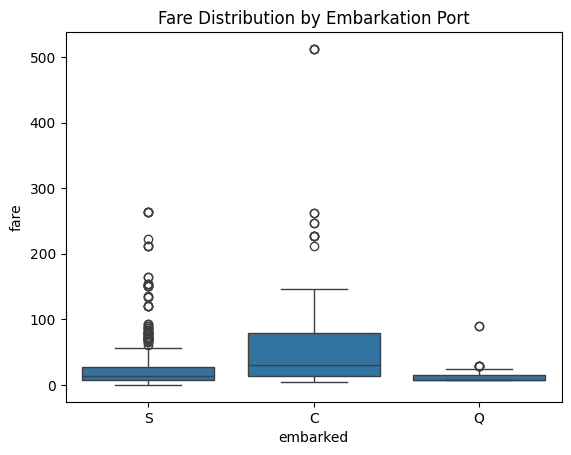

In [ ]:
# Create a boxplot to show how fare varies across different embarkation ports
sns.boxplot(x='embarked',         # Categorical variable on x-axis (Cherbourg, Queenstown, Southampton)
            y='fare',            # Numerical variable on y-axis
            data=dataset)         # Source DataFrame

# Set the title of the plot
plt.title("Fare Distribution by Embarkation Port")

# Display the plot
plt.show()


In [ ]:
# Group the dataset by 'sex' and calculate the mean age for each group
print(dataset.groupby('sex')['age'].mean())

# Group the dataset by 'class' and calculate the median fare for each class
print(dataset.groupby('class')['fare'].median())

sex
female    27.915709
male      30.726645
Name: age, dtype: float64
class
First     60.2875
Second    14.2500
Third      8.0500
Name: fare, dtype: float64


<ipython-input-46-4237668677>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(dataset.groupby('class')['fare'].median())


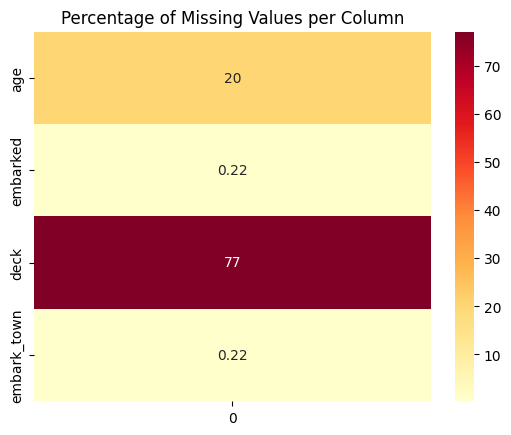

In [ ]:
# Calculate the percentage of missing (null) values for each column
null_percentage = dataset.isnull().mean() * 100

# Filter out only columns with missing values (> 0%) and convert to DataFrame for heatmap
sns.heatmap(
    null_percentage[null_percentage > 0].to_frame(),  # Only columns with missing values
    annot=True,               # Display the percentage as numbers on the heatmap
    cmap="YlOrRd"             # Use the 'Yellow-Orange-Red' color map for better visualization
)

# Display the heatmap
plt.title("Percentage of Missing Values per Column")
plt.show()